# Testing a Change in the Auto Owernship Model

The alternative scenario starts from the base scenario.  The script below copies the *example* to new *example_alt* folder.  It then modifies the household sample size and runs the model so we get different results.

In [0]:
%cd ../
!cp -R 'activitysim/example' 'example_alt'
!cp 'activitysim/activitysim/abm/test/data/mtc_asim.h5' 'example_alt/data'
!cp 'activitysim/activitysim/abm/test/data/skims.omx' 'example_alt/data'
%cd example_alt

/content
/content/example_alt


In [0]:
import yaml 
settings = yaml.load(open("configs/settings.yaml","r"), Loader=yaml.SafeLoader)
old_sample_size = settings["households_sample_size"]
settings["households_sample_size"] = settings["households_sample_size"] + 5
yaml.dump(settings, open("configs/settings.yaml","w"))
settings = yaml.load(open("configs/settings.yaml","r"), Loader=yaml.SafeLoader)
print("new households_sample_size " + str(settings["households_sample_size"]) + " previous " + str(old_sample_size))

new households_sample_size 105 previous 100


In [0]:
!python simulation.py

INFO - Read logging configuration from: configs/logging.yaml
INFO - open_pipeline
INFO - Set random seed base to 0
INFO - Time to execute open_pipeline : 0.002 seconds (0.0 minutes)
INFO - preload_injectables
INFO - Time to execute preload_injectables : 0.0 seconds (0.0 minutes)
INFO - loaded land_use (25, 41)
INFO - renaming land_use columns {'COUNTY': 'county_id'}
INFO - annotated land_use SPEC annotate_landuse
INFO - loading skim_dict from data/skims.omx
INFO - allocating shared buffer skim_skims_0 for 516250 ([25.0, 25.0]) matrices (2.0 MB)
INFO - load_skims loaded skims from data/skims.omx
INFO - block_name skim_skims_0 bytes 2065000 (2.0 MB)
INFO - Running compute_accessibility with 25 dest zones
INFO - Running compute_accessibility with 25 dest zones 25 orig zones
INFO - init AccessibilitySkims with 25 dest zones 25 orig zones omx_shape (25, 25)
INFO - init AccessibilitySkims with 25 dest zones 25 orig zones omx_shape (25, 25)
INFO - full household list contains 5000 households


# Comparing Results

To compare results between scenarios, read the resulting tables into Python (or other) and create summaries.  The following script reads the outputs and plots the difference in household auto ownership.  

**TODO - ADD MANY MORE SUMMARIES AND SOME MAPS SPECIFIC TO THE SCENARIO TESTED**

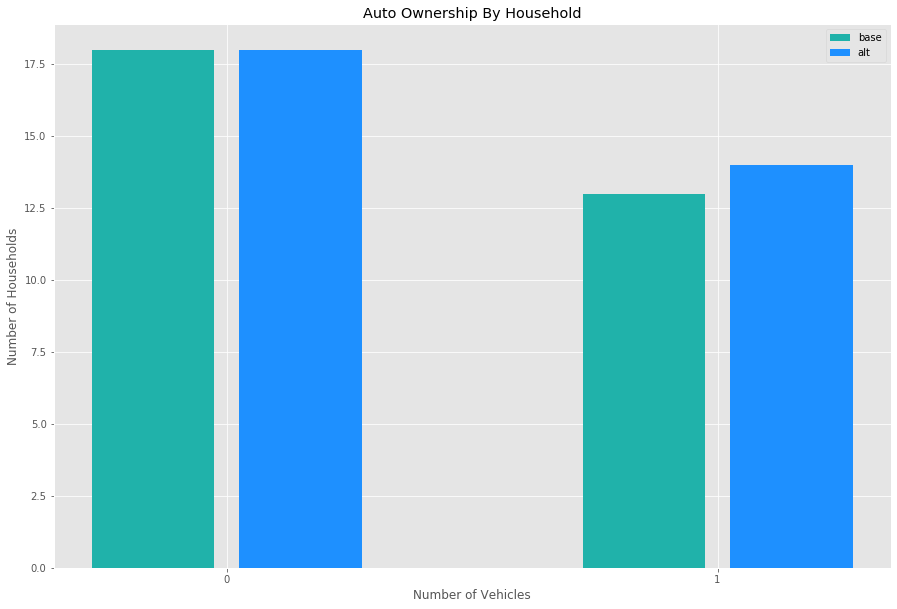

In [0]:
import matplotlib.pyplot as plt

#read and summarize data
hh_base = pd.read_csv("../example/output/final_households.csv")
hh_alt = pd.read_csv("output/final_households.csv")

autos_base = hh_base.groupby(["TAZ", "auto_ownership"]).count()["SERIALNO"]
auto_base_counts = autos_base.groupby(["auto_ownership"]).count()

autos_alt = hh_alt.groupby(["TAZ", "auto_ownership"]).count()["SERIALNO"]
auto_alt_counts = autos_alt.groupby(["auto_ownership"]).count()

#create plot
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

plt.bar(x=auto_base_counts.index - 0.15, height=auto_base_counts.values, width=0.25, label="base", color="lightseagreen")
plt.bar(x=auto_alt_counts.index + 0.15, height=auto_alt_counts.values, width=0.25, label="alt", color="dodgerblue")

plt.title('Auto Ownership By Household')
plt.ylabel('Number of Households')
plt.legend()
plt.xticks(auto_base_counts.index.values, auto_base_counts.index.values)
_ = plt.xlabel('Number of Vehicles')
